# Part 1 :Data Preprocessing

dataset link: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

## Importing the lib and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset =pd.read_csv('/content/data.csv')

In [3]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data Exploration

In [4]:
dataset.shape

(569, 33)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
# Categorical data
dataset.select_dtypes(include='object').columns

Index(['diagnosis'], dtype='object')

In [7]:
dataset.select_dtypes(include='float64').columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [8]:
len(dataset.select_dtypes(include='object').columns)

1

In [11]:
# Numerical data
dataset.select_dtypes(include=['float64','int64']).columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [12]:
# Statistical summary
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [13]:
# To get the list of all the columns
dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

## Dealing with the missing values

In [14]:
# If there are any null value in this dataset
dataset.isnull().values.any()

True

In [15]:
dataset.isnull().values.sum()

569

In [16]:
# Columns with the null values
dataset.columns[dataset.isnull().any()]

Index(['Unnamed: 32'], dtype='object')

In [17]:
len(dataset.columns[dataset.isnull().any()])

1

In [18]:
dataset['Unnamed: 32'].count()

0

This means that all the values in this column are null values

In [19]:
# Drop the column with null values
dataset = dataset.drop(columns='Unnamed: 32')

In [20]:
dataset.shape

(569, 32)

In [21]:
# Again checking for null value sin our dataset
dataset.isnull().values.any()

False

## Dealing with categorical data

In [22]:
# Categorical data
dataset.select_dtypes(include='object').columns

Index(['diagnosis'], dtype='object')

In [23]:
# How many unique values in this column
dataset['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [24]:
dataset['diagnosis'].nunique()

2

There are only two unique values malignant and benine

In [29]:
# one hot encoding
dataset = pd.get_dummies(data=dataset, drop_first=True).astype(int)


In [30]:
dataset.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17,10,122,1001,0,0,0,0,0,...,17,184,2019,0,0,0,0,0,0,1
1,842517,20,17,132,1326,0,0,0,0,0,...,23,158,1956,0,0,0,0,0,0,1
2,84300903,19,21,130,1203,0,0,0,0,0,...,25,152,1709,0,0,0,0,0,0,1
3,84348301,11,20,77,386,0,0,0,0,0,...,26,98,567,0,0,0,0,0,0,1
4,84358402,20,14,135,1297,0,0,0,0,0,...,16,152,1575,0,0,0,0,0,0,1


## Countplot

In [33]:
dataset['diagnosis_M'] = dataset['diagnosis_M'].astype(int)


In [34]:
print(dataset['diagnosis_M'].unique())


[1 0]


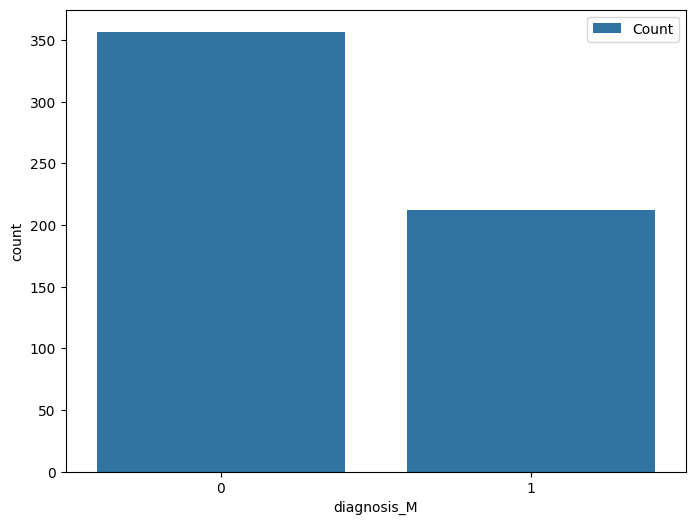

In [35]:
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis_M', data=dataset, label='Count')
plt.show()


In [37]:
# Total Benine values
(dataset.diagnosis_M== 0).sum()

357

In [38]:
# Total Maglignant values
(dataset.diagnosis_M== 1).sum()

212

## Correlation matrix and heatmap

In [40]:
# Diagonsis_M is the dependent variable so we have to drop that
dataset_2 = dataset.drop(columns='diagnosis_M')

In [41]:
dataset_2.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17,10,122,1001,0,0,0,0,0,...,25,17,184,2019,0,0,0,0,0,0
1,842517,20,17,132,1326,0,0,0,0,0,...,24,23,158,1956,0,0,0,0,0,0
2,84300903,19,21,130,1203,0,0,0,0,0,...,23,25,152,1709,0,0,0,0,0,0
3,84348301,11,20,77,386,0,0,0,0,0,...,14,26,98,567,0,0,0,0,0,0
4,84358402,20,14,135,1297,0,0,0,0,0,...,22,16,152,1575,0,0,0,0,0,0


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


<Axes: title={'center': 'Correlated with diagnosis_M'}>

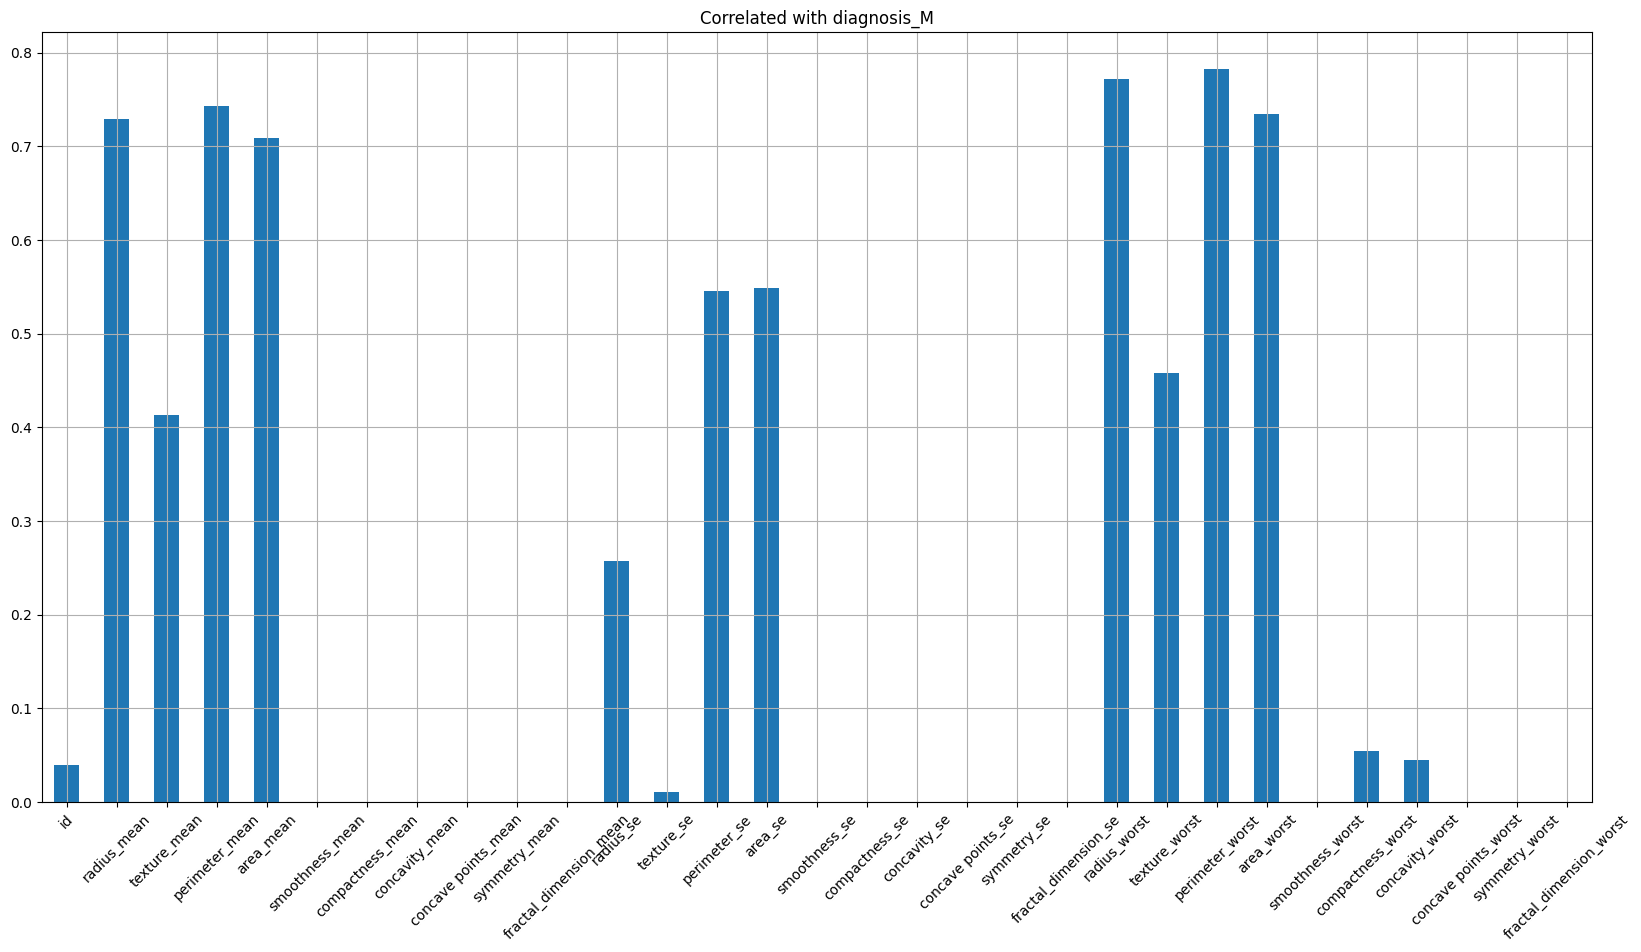

In [47]:
# Correlating the diagnosis_m with the rest data in the dataset
# to seet the correlation use corrwith function
dataset_2.corrwith(dataset['diagnosis_M']).plot.bar(
    figsize = (20,10), title = 'Correlated with diagnosis_M', rot = 45, grid = True
)

In [48]:
# Correlation matrix
corr = dataset.corr()

In [49]:
corr

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
id,1.000000,0.080850,0.103790,0.072988,0.096846,NaN,NaN,NaN,NaN,NaN,...,0.066579,0.080122,0.107167,NaN,0.018183,-0.000938,NaN,NaN,NaN,0.039769
radius_mean,0.080850,1.000000,0.326901,0.994743,0.984391,NaN,NaN,NaN,NaN,NaN,...,0.300983,0.961116,0.937129,NaN,-0.019295,-0.033478,NaN,NaN,NaN,0.729388
texture_mean,0.103790,0.326901,1.000000,0.329254,0.321179,NaN,NaN,NaN,NaN,NaN,...,0.909231,0.358562,0.343754,NaN,0.050654,0.082271,NaN,NaN,NaN,0.413581
perimeter_mean,0.072988,0.994743,0.329254,1.000000,0.986381,NaN,NaN,NaN,NaN,NaN,...,0.303313,0.970159,0.941437,NaN,-0.014650,-0.030413,NaN,NaN,NaN,0.742675
area_mean,0.096846,0.984391,0.321179,0.986381,1.000000,NaN,NaN,NaN,NaN,NaN,...,0.287537,0.959064,0.959219,NaN,-0.021413,-0.036050,NaN,NaN,NaN,0.708948
smoothness_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
compactness_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
concavity_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
concave points_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
symmetry_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

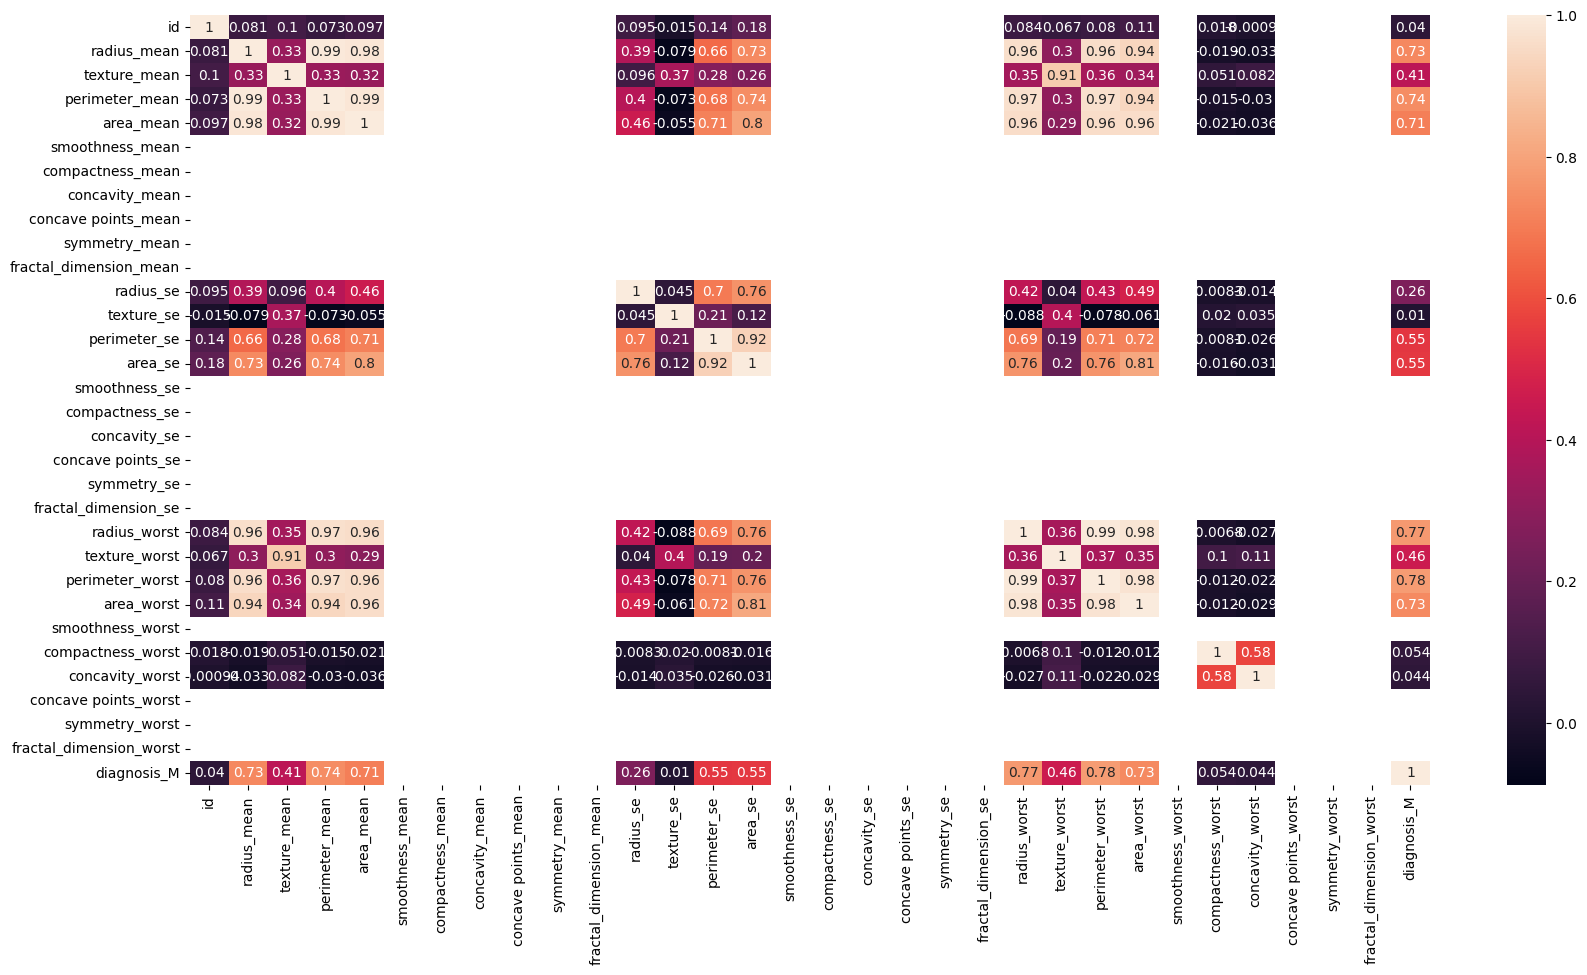

In [50]:
# heatmap
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot = True)

## Splitting the dataset into train and test set

In [51]:
dataset.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17,10,122,1001,0,0,0,0,0,...,17,184,2019,0,0,0,0,0,0,1
1,842517,20,17,132,1326,0,0,0,0,0,...,23,158,1956,0,0,0,0,0,0,1
2,84300903,19,21,130,1203,0,0,0,0,0,...,25,152,1709,0,0,0,0,0,0,1
3,84348301,11,20,77,386,0,0,0,0,0,...,26,98,567,0,0,0,0,0,0,1
4,84358402,20,14,135,1297,0,0,0,0,0,...,16,152,1575,0,0,0,0,0,0,1


In [52]:
# dependent value y means the target varibale is diagnosis_m

# matrix of features / independent variables
# swlect all the columns except last one
x = dataset.iloc[:, 1:-1].values

In [53]:
x.shape

(569, 30)

In [54]:
# Target variable / Dependent variable
# Only select the last column
y = dataset.iloc[:, -1].values

In [55]:
y.shape

(569,)

There are total 569 rows

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=0)

In [58]:
x_train.shape

(455, 30)

In [61]:
x_test.shape

(114, 30)

In [62]:
y_train.shape

(455,)

In [63]:
y_test.shape

(114,)

## Feature Scaling

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
sc = StandardScaler()

In [67]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [68]:
x_train

array([[-1.01188724, -0.39465934, -1.1245477 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.01188724,  0.56432597, -0.96003706, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.66639476, -1.11389832,  0.52055865, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.29160091, -0.15491301, -1.33018599, ...,  0.        ,
         0.        ,  0.        ],
       [-1.29160091, -0.15491301, -1.28905833, ...,  0.        ,
         0.        ,  0.        ],
       [-0.73217358,  1.04381862, -0.71327111, ...,  0.        ,
         0.        ,  0.        ]])

In [69]:
x_test

array([[-0.17274624,  0.32457964, -0.13748389, ...,  0.        ,
         0.        ,  0.        ],
       [-0.17274624,  1.52331127, -0.30199452, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.10696742, -0.87415199, -0.09635623, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.78524943,  0.08483332,  1.71326075, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.22582209,  0.32457964,  1.17860119, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.38668109, -0.63440566,  0.2737927 , ...,  0.        ,
         0.        ,  0.        ]])

# Part 2: Building the model

## Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression

In [72]:
classifir_lr = LogisticRegression(random_state=0)

In [73]:
classifir_lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [74]:
y_pred = classifir_lr.predict(x_test)

In [75]:
# Confusion matrix is used to see number of correct and number of incorrect predictions
# Accuracy score is to check accuracy of the model
# f1 score reaches best value at 1 and worst value at 0
# precision score tp is true positives and fp is false positives and its best score is also 1 and worst is 0
# recall score tp is true postive and fn is false negatives and best value is 1 and worst is 0

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score,precision_score,recall_score

In [76]:
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [77]:
results = pd.DataFrame([['Logistic Regression' , acc , f1, prec, rec]],
                       columns= ['Model', 'Accuracy', 'F1 Score', 'Precision' , 'Recall'])

In [78]:
results

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.95614,0.947368,0.9375,0.957447


Getting a nice accuracy

In [79]:
cm = confusion_matrix(y_test, y_pred)

In [80]:
cm

array([[64,  3],
       [ 2, 45]])

### Cross validation

In [81]:
from sklearn.model_selection import cross_val_score

In [83]:
accuracies = cross_val_score(estimator = classifir_lr, X = x_train, y= y_train, cv= 10)

In [98]:
print('Accuracy is {:.2f} %'.format(accuracies.mean()*100))
print('Standard Deviation is {:.2f} %'.format(accuracies.std()*100))

Accuracy is 94.07 %
Standard Deviation is 3.41 %


## Random Forest

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
classifir_rf = RandomForestClassifier(random_state=0)
classifir_rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [87]:
y_pred = classifir_rf.predict(x_test)

In [88]:

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score,precision_score,recall_score

In [89]:
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [91]:
model_results = pd.DataFrame([['Random Forest' , acc , f1, prec, rec]],
                       columns= ['Model', 'Accuracy', 'F1 Score', 'Precision' , 'Recall'])

In [93]:
model_results

,Model,Accuracy,F1 Score,Precision,Recall
0,Random Forest,0.95614,0.947368,0.9375,0.957447


In [94]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[64  3]
 [ 2 45]]


Total 5 incorrect predictions

### cross validation

In [96]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifir_rf, X = x_train, y= y_train, cv= 10)
print('Accuracy is {:.2f} %'.format(accuracies.mean()*100))
print('Standard Deviation is {:.2f} %'.format(accuracies.std()*100))

Accuracy is 94.07 %
Standard Deviation is 3.41 %


# Part 3: Randomized Search to find the best parameters (Logistic Regression)

In [99]:
from sklearn.model_selection import RandomizedSearchCV

In [110]:
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV

# Adjust the param_distributions to make it valid
param_distributions = [
    {'solver': ['newton-cg', 'lbfgs'], 'penalty': ['l2'], 'C': loguniform(0.001, 100)},
    {'solver': ['saga'], 'penalty': ['l2', 'elasticnet'], 'C': loguniform(0.001, 100), 'l1_ratio': [0.15, 0.5, 0.85]},
    {'solver': ['liblinear'], 'penalty': ['l1', 'l2'], 'C': loguniform(0.001, 100)},
]

random_search = RandomizedSearchCV(estimator=classifir_lr, param_distributions=param_distributions,
                                   n_iter=10, scoring='roc_auc', n_jobs=-1, cv=10, verbose=3)

random_search.fit(x_train, y_train)





Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=LogisticRegression(random_state=0),
                   n_jobs=-1,
                   param_distributions=[{'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c5fa80f73a0>,
                                         'penalty': ['l2'],
                                         'solver': ['newton-cg', 'lbfgs']},
                                        {'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c5fa7517ee0>,
                                         'l1_ratio': [0.15, 0.5, 0.85],
                                         'penalty': ['l2', 'elasticnet'],
                                         'solver': ['saga']},
                                        {'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c5fa749cc40>,
                                         'penalty': ['l1', 'l2'],
                                         'solver': ['liblinear']}],
                   scoring='roc_auc', verbose=3)

In [111]:
random_search.best_estimator_

LogisticRegression(C=1.1948445614769316, penalty='l1', random_state=0,
                   solver='liblinear')

In [112]:
random_search.best_score_

0.990922920892495

In [113]:
random_search.best_params_

{'C': 1.1948445614769316, 'penalty': 'l1', 'solver': 'liblinear'}

# Part 4 : Final Model (Logistic Regression)

In [114]:
from sklearn.linear_model import LogisticRegression
classifir = LogisticRegression(C=1.1948445614769316, penalty='l1', random_state=0,
                   solver='liblinear')
classifir.fit(x_train, y_train)


LogisticRegression(C=1.1948445614769316, penalty='l1', random_state=0,
                   solver='liblinear')

In [115]:
y_pred = classifir.predict(x_test)

In [117]:
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

model_results = pd.DataFrame([['Final Logistic Regression' , acc , f1, prec, rec]],
                       columns= ['Model', 'Accuracy', 'F1 Score', 'Precision' , 'Recall'])

model_results

,Model,Accuracy,F1 Score,Precision,Recall
0,Final Logistic Regression,0.947368,0.9375,0.918367,0.957447


## Cross Validation

In [118]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifir, X = x_train, y= y_train, cv= 10)
print('Accuracy is {:.2f} %'.format(accuracies.mean()*100))
print('Standard Deviation is {:.2f} %'.format(accuracies.std()*100))

Accuracy is 94.52 %
Standard Deviation is 3.26 %
